In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from collections import defaultdict
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
label_encoder = LabelEncoder()# converts labels into integers


In [3]:
train= pd.read_csv("/Users/esra/Documents/UCL/COMPGW02 - Web Economics/we_data/train.csv")
test= pd.read_csv("/Users/esra/Documents/UCL/COMPGW02 - Web Economics/we_data/test.csv")
validation= pd.read_csv("/Users/esra/Documents/UCL/COMPGW02 - Web Economics/we_data/validation.csv")
train.head(10)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [4]:
train.shape

(2430981, 25)

### Data Analysis

In [5]:
data = pd.DataFrame()
data= train.groupby('advertiser').agg({'url':"nunique",'click':sum , 'payprice':'unique' }).reset_index()
data['cost'] = [totcost.sum() for totcost in data["payprice"]]
data.drop(['payprice'],  axis=1, inplace=True)
data.columns=['advertiser', 'impressions', 'clicks', 'cost']
data['CTR'] = (((data.clicks / data.impressions) * 100).round(3)).astype(str) + '%'
data['CPM'] = (((data.cost / data.impressions) * 1000).round(2)).astype(str)
data['eCPC'] = ((data.cost / data.clicks).round(2)).astype(str)

In [6]:
data

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,385,164550,45149,42740.26%,117270.13,0.27
1,2259,43,68321,43365,158886.047%,1008488.37,0.63
2,2261,36,52013,43365,144480.556%,1204583.33,0.83
3,2821,131,106555,43365,81339.695%,331030.53,0.41
4,2997,217,3717,38497,1712.903%,177405.53,10.36
5,3358,202,118717,27787,58770.792%,137559.41,0.23
6,3386,320,163132,45150,50978.75%,141093.75,0.28
7,3427,272,150245,27787,55237.132%,102158.09,0.18
8,3476,187,119248,31164,63768.984%,166652.41,0.26


In [7]:
# 1. Analyzing CTR per day of the week
CTR = pd.DataFrame()
CTR= train.groupby(['advertiser', 'weekday']).agg({'bidid':"count",'click': sum }).reset_index() 
CTR.columns= ['advertiser','weekday','Totimps','Totclick']
CTR['CTR_day'] = ((CTR.Totclick / CTR.Totimps)* 100).round(4)
CTR_a1458 =CTR[CTR.advertiser==1458]
CTR_a3358 =CTR[CTR.advertiser==3358]


In [8]:
CTR_a1458

,advertiser,weekday,Totimps,Totclick,CTR_day
0,1458,0,52,76372,146869.2308
1,1458,1,63,66245,105150.7937
2,1458,2,48,67985,141635.4167
3,1458,3,52,68874,132450.0000
4,1458,4,62,69881,112711.2903
5,1458,5,62,71634,115538.7097
6,1458,6,46,71362,155134.7826


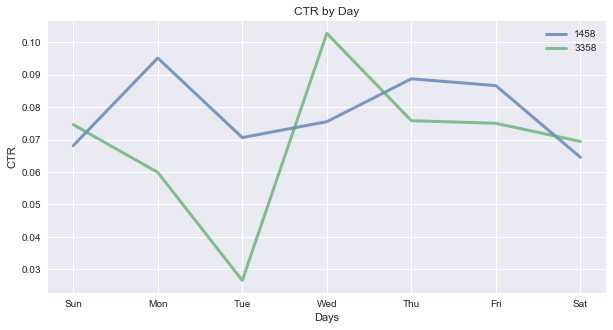

In [8]:
fig=plt.figure(figsize=(10,5))  # Size of the graph

fig.add_subplot()
plt.plot(CTR_a1458.weekday,CTR_a1458.CTR_day,alpha=0.7, lw=3)
plt.plot(CTR_a3358.weekday,CTR_a3358.CTR_day,alpha=0.7, lw=3)

plt.ylabel('CTR')    
plt.xticks(np.arange(7),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'))
plt.xlabel('Days')  
plt.legend(['1458', '3358'])
plt.title('CTR by Day')
plt.savefig('day-ctr', format='png', dpi=105)

In [9]:
# 1. Analyzing CTR per hour of the day
CTR2 = pd.DataFrame()
CTR2= train.groupby(['advertiser', 'hour']).agg({'bidid':"count",'click': sum }).reset_index() 
CTR2.columns= ['advertiser','hour','Totimps','Totclick']
CTR2['CTR_Hour'] = ((CTR2.Totclick / CTR2.Totimps)* 100).round(4)
CTR2_a1458 =CTR2[CTR2.advertiser==1458]
CTR2_a3358 =CTR2[CTR2.advertiser==3358]


In [10]:
CTR2_a1458

,advertiser,hour,Totimps,Totclick,CTR_Hour
0,1458,0,22945,23,0.1002
1,1458,1,9900,6,0.0606
2,1458,2,6064,7,0.1154
3,1458,3,6517,3,0.0460
4,1458,4,3324,3,0.0903
5,1458,5,3751,6,0.1600
6,1458,6,4626,4,0.0865
7,1458,7,9745,7,0.0718
8,1458,8,14401,13,0.0903
9,1458,9,18046,16,0.0887


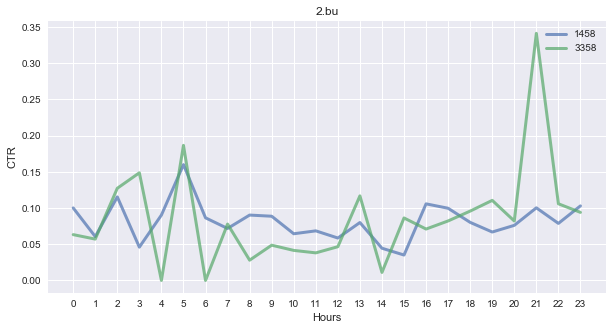

In [11]:
fig=plt.figure(figsize=(10,5))  # Size of the graph

fig.add_subplot()
plt.plot(CTR2_a1458.hour,CTR2_a1458.CTR_Hour,alpha=0.7, lw=3)
plt.plot(CTR2_a3358.hour,CTR2_a3358.CTR_Hour,alpha=0.7, lw=3)

plt.ylabel('CTR')    
plt.xticks(np.arange(24))
plt.xlabel('Hours')  
plt.legend(['1458', '3358'])
plt.title('2.bu')

#plt.setp(yticklabels, visible=True)
plt.show()
plt.savefig('hour-ctr', format='png', dpi=105)

In [12]:
# 3. Analyzing CTR per region

CTR3 = pd.DataFrame()
CTR3= train.groupby(['advertiser', 'region']).agg({'bidid':"count",'click': sum }).reset_index() 
CTR3.columns= ['advertiser','region','Totimps','Totclick']
CTR3['CTR_Region'] = ((CTR3.Totclick / CTR3.Totimps)* 100).round(4)
CTR3_a1458 =CTR3[CTR3.advertiser==1458]
CTR3_a3358 =CTR3[CTR3.advertiser==3358]

regions=xi = [i for i in range(0, len(CTR3['region']))]

In [14]:
CTR3_a1458

,advertiser,region,Totimps,Totclick,CTR_Region
0,1458,0,7131,6,0.0841
1,1458,1,21360,17,0.0796
2,1458,2,7969,4,0.0502
3,1458,3,24605,21,0.0853
4,1458,15,15076,15,0.0995
5,1458,27,7050,3,0.0426
6,1458,40,18564,11,0.0593
7,1458,55,11053,5,0.0452
8,1458,65,11692,12,0.1026
9,1458,79,12974,14,0.1079


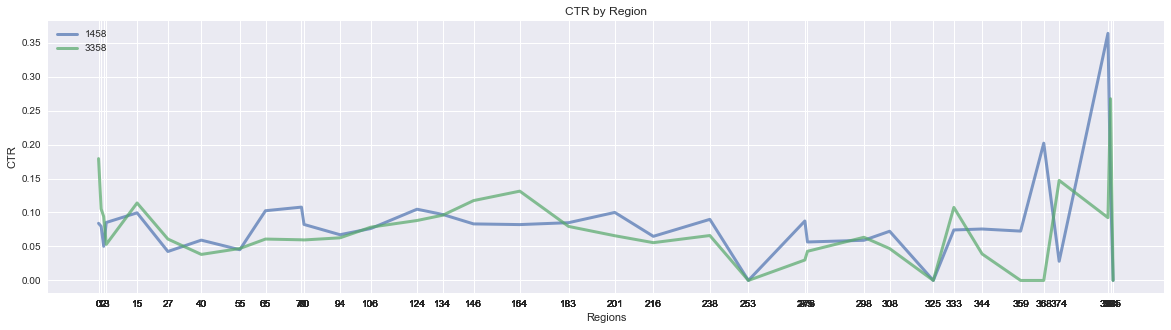

In [13]:
fig=plt.figure(figsize=(20,5))  # Size of the graph

fig.add_subplot()
plt.plot(CTR3_a1458.region,CTR3_a1458.CTR_Region,alpha=0.7, lw=3)
plt.plot(CTR3_a3358.region,CTR3_a3358.CTR_Region,alpha=0.7, lw=3)

plt.ylabel('CTR')    
#plt.xticks(np.arange(24))
plt.xlabel('Regions')  
plt.legend(['1458', '3358'])
plt.title('CTR by Region')

plt.xticks(CTR3['region'])
plt.show()
plt.savefig('region-ctr', format='png', dpi=105)

In [15]:
# 4. Analyzing CTR per slotsize

CTR4 = pd.DataFrame()
CTR4 = train[['advertiser', 'slotwidth', 'slotheight','bidid','click']].copy()
CTR4['slotsize']= (CTR4.slotwidth * CTR4.slotheight)/1000
CTR4
CTR4= CTR4.groupby(['advertiser', 'slotsize']).agg({'bidid':"count",'click': sum }).reset_index() 

CTR4.columns= ['advertiser','slotsize','Totimps','Totclick']
CTR4['CTR_slotsize'] = ((CTR4.Totclick / CTR4.Totimps)* 100).round(4)
CTR4_a1458 =CTR4[CTR4.advertiser==1458]
CTR4_a3358 =CTR4[CTR4.advertiser==3358]


In [16]:
CTR4_a3358

,advertiser,slotsize,Totimps,Totclick,CTR_slotsize
59,3358,40.00,8362,3,0.0359
60,3358,62.50,12532,7,0.0559
61,3358,65.52,36802,11,0.0299
62,3358,72.00,942,0,0.0000
63,3358,75.00,87844,94,0.1070
64,3358,85.50,41900,28,0.0668
65,3358,86.40,1643,0,0.0000
66,3358,90.00,40054,40,0.0999
67,3358,94.08,20933,10,0.0478
68,3358,96.00,13454,9,0.0669


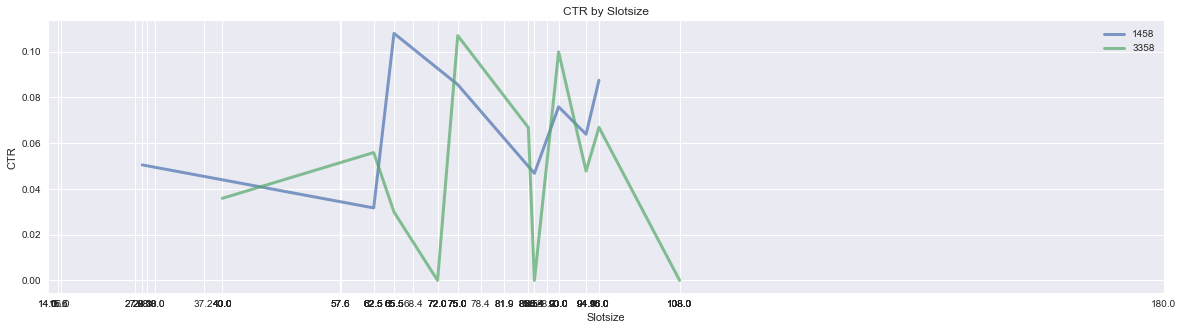

In [17]:
fig=plt.figure(figsize=(20,5))  # Size of the graph

fig.add_subplot()
plt.plot(CTR4_a1458.slotsize,CTR4_a1458.CTR_slotsize,alpha=0.7, lw=3)
plt.plot(CTR4_a3358.slotsize,CTR4_a3358.CTR_slotsize,alpha=0.7, lw=3)

plt.ylabel('CTR')    
#plt.xticks(np.arange(24))
plt.xlabel('Slotsize')  
plt.legend(['1458', '3358'])
plt.title('CTR by Slotsize')

plt.xticks(CTR4['slotsize'])
plt.show()
plt.savefig('slotsize-ctr', format='png', dpi=105)

In [19]:
# 5. Analyzing CTR per OS
le = LabelEncoder()

CTR5 = pd.DataFrame()
CTR5 = train[['advertiser', 'useragent','bidid','click']].copy()
CTR5['OS'],CTR5['browser']=CTR5['useragent'].str.split('_', 1).str
CTR5= CTR5.groupby(['advertiser', 'OS']).agg({'bidid':"count",'click': sum }).reset_index() 

CTR5.columns= ['advertiser','OS','Totimps','Totclick']
CTR5['CTR_OS'] = ((CTR5.Totclick / CTR5.Totimps)* 100).round(4)
CTR5['OS_NUM'] =le.fit_transform(CTR5['OS'])
CTR5_a1458 =CTR5[CTR5.advertiser==1458]
CTR5_a3358 =CTR5[CTR5.advertiser==3358]


In [22]:
CTR5_a3358

,advertiser,OS,Totimps,Totclick,CTR_OS,OS_NUM
26,3358,android,3800,18,0.4737,0
27,3358,ios,66,0,0.0000,1
28,3358,linux,198,1,0.5051,2
29,3358,mac,9610,38,0.3954,3
30,3358,other,189,0,0.0000,4
31,3358,windows,251093,145,0.0577,5


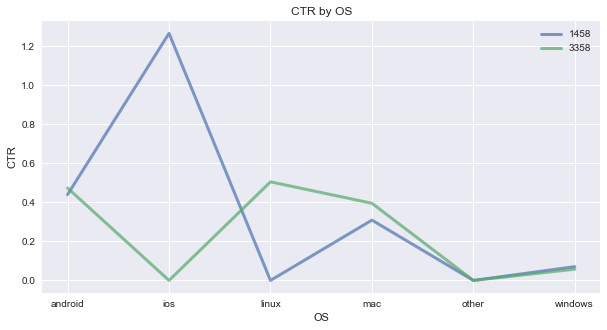

In [21]:
fig=plt.figure(figsize=(10,5))  # Size of the graph

fig.add_subplot()
plt.plot(CTR5_a1458.OS_NUM,CTR5_a1458.CTR_OS,alpha=0.7, lw=3)
plt.plot(CTR5_a3358.OS_NUM,CTR5_a3358.CTR_OS,alpha=0.7, lw=3)

plt.ylabel('CTR')    
plt.xticks(np.arange(6),('android','ios','linux','mac','other','windows'))
plt.xlabel('OS')  
plt.legend(['1458', '3358'])
plt.title('CTR by OS')

#plt.xticks(CTR4['slotsize'])
plt.show()
plt.savefig('OS-ctr', format='png', dpi=105)

###  Logistic regression 

In [9]:
train['OS'],train['browser']=train['useragent'].str.split('_', 1).str
validation['OS'],validation['browser']=validation['useragent'].str.split('_', 1).str
test['OS'],test['browser']=test['useragent'].str.split('_', 1).str

In [10]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,OS,browser
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,Na,0,10722,294,23,null,2821,null,windows,chrome
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,Na,133,7330,277,133,null,2259,null,windows,ie


In [11]:
X_train = train.drop(['usertag','click', 'useragent'], axis=1)
y_train = train.click

X_test = test.drop(['usertag','useragent'], axis=1)

X_val = validation.drop(['usertag','click','useragent'], axis=1)
y_val = validation.click


from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [12]:
X_train.select_dtypes(include=['object']).columns

Index(['bidid', 'userid', 'IP', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotvisibility', 'slotformat', 'creative', 'keypage', 'OS',
       'browser'],
      dtype='object')

In [13]:
columnsToConvert = ['bidid', 'userid', 'IP', 'adexchange', 'domain',
       'url', 'urlid', 'slotid', 'slotvisibility', 'slotformat','creative', 'keypage', 'OS', 'browser']

In [14]:
le = LabelEncoder()
for feature in columnsToConvert:
    X_train[feature] = le.fit_transform(X_train[feature])
    X_val[feature] = le.fit_transform(X_val[feature])

In [15]:
X_train.head()

,weekday,hour,bidid,userid,IP,region,city,adexchange,domain,url,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,OS,browser
0,5,22,1744697,426429,253587,2,2,1,21783,268016,...,2,0,5,104,238,5,0,3427,5,2
1,1,20,753317,532622,282720,238,239,0,728,145905,...,6,3,0,9,294,23,18,2821,5,0
2,3,13,1728576,1172242,469429,40,41,1,18426,262017,...,2,0,5,92,238,24,0,3427,5,2
3,6,23,31142,123369,107833,1,1,0,4770,658015,...,2,1,0,111,300,25,12,1458,5,2
4,5,6,365157,1484620,342191,216,233,1,153,157670,...,8,3,133,84,277,133,18,2259,5,2


In [16]:
X_val.head()

,weekday,hour,bidid,userid,IP,region,city,adexchange,domain,url,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,OS,browser
0,4,20,222938,120625,137474,79,79,0,8596,45239,...,2,1,0,109,300,23,12,1458,5,2
1,1,21,106645,191832,178167,79,79,0,7202,109524,...,0,1,0,108,238,75,7,3476,5,0
2,4,8,293073,95567,52834,2,2,1,8456,75356,...,2,0,5,99,238,65,14,3358,5,2
3,5,15,214745,103210,192739,201,205,1,8932,27901,...,2,0,5,116,238,6,14,3358,5,0
4,1,18,10091,270432,55070,134,135,1,6583,135142,...,1,0,5,42,249,5,5,3476,5,0


In [17]:
validation.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,OS,browser
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,...,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,...,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2,...,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2,...,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2,...,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
LS=logreg.fit(X_train, y_train)

In [19]:
y_predicted=pd.Series(logreg.predict(X_val))

In [20]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives 
#and fp the number of false positives. The precision is intuitively the ability of the classifier 
#not to label as positive a sample that is negative.
#The best value is 1 and the worst value is 0.
from sklearn.metrics import precision_score
precision_score(y_val, y_predicted)

/Users/esra/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [21]:
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The best value is 1 and the worst value is 0.
from sklearn.metrics import recall_score
recall_score(y_val, y_predicted) # y_predicted=0

0.0

In [22]:
y_val.describe()

count    303925.000000
mean          0.000665
std           0.025772
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click, dtype: float64

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_predicted)

0.5

In [24]:
# this score is too high because its 0 for all the values. in validation set there are 202/303925 values are 1. 
#thats why it looks a very high score, but couldn't predict anything
score = logreg.score(X_val, y_val)
print(score)

0.999335362343


In [25]:
from sklearn import metrics
fpr, tpr , thresholds = metrics.roc_curve(y_val,y_predicted)
metrics.auc(fpr, tpr)


0.5

/Users/esra/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


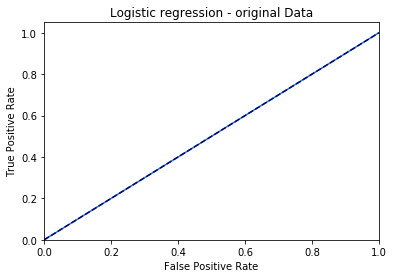

In [26]:
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression - original Data')
plt.legend(loc="lower right")
plt.show()

### Example ROC curve for Explanation

In [118]:
y_true = np.array([0, 0, 1, 1,0, 0, 1, 1])
y_pred = np.array([0, 0, 1, 1,0, 1, 0, 1])

In [119]:
from sklearn import metrics
fpr, tpr , thresholds = metrics.roc_curve(y_true,y_pred)
metrics.auc(fpr, tpr)


0.75

In [123]:
from sklearn.metrics import confusion_matrix
(tn, fp, fn, tp)=confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(3, 1, 1, 3)

/Users/esra/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


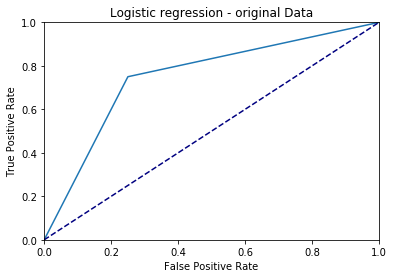

In [120]:
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression - original Data')
plt.legend(loc="lower right")
plt.show()

### Unbalanced data fix 
#### Feature selection

In [104]:
#Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), 
#the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller 
#and smaller sets of features.  Selected (i.e., estimated best) features are assigned rank 1.
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True  True  True  True False False False
  True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 6 5 3 1 1 1 1 4 7 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [107]:
X_train.columns

Index(['weekday', 'hour', 'bidid', 'userid', 'IP', 'region', 'city',
       'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth',
       'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative',
       'bidprice', 'payprice', 'keypage', 'advertiser', 'OS', 'browser'],
      dtype='object')

In [9]:
# New features reduced by importance
X_train2 =pd.DataFrame()
X_train2= X_train[['weekday', 'hour',  'region', 'city','adexchange', 'domain',  
                   'slotwidth','slotheight', 'slotvisibility', 'slotformat', 'slotprice', 
                   'creative','bidprice', 'payprice', 'keypage', 'advertiser', 'OS', 'browser']].copy()

In [17]:
X_val2= X_val[['weekday', 'hour',  'region', 'city','adexchange', 'domain',  
                   'slotwidth','slotheight', 'slotvisibility', 'slotformat', 'slotprice', 
                   'creative','bidprice', 'payprice', 'keypage', 'advertiser', 'OS', 'browser']].copy()

In [116]:
y_train.sum()

1793

#### Undersampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler 

In [13]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X_train2, y_train)

In [15]:
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 1793, 1: 1793})


In [57]:
X_resdf=pd.DataFrame(X_res)
X_resdf.columns=['weekday', 'hour',  'region', 'city','adexchange', 'domain',  
                   'slotwidth','slotheight', 'slotvisibility', 'slotformat', 'slotprice', 
                   'creative','bidprice', 'payprice', 'keypage', 'advertiser', 'OS', 'browser']
y_resdf=pd.DataFrame(y_res)

count    2.430981e+06
mean     7.375623e-04
std      2.714809e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: click, dtype: float64

#### Logistic Regression for undersampled data

In [18]:
logreg_u = LogisticRegression()
LS_u=logreg_u.fit(X_res, y_res)
y_underpredicted=pd.Series(logreg_u.predict(X_val2))

In [21]:
sum(y_underpredicted)

76283

In [20]:
from sklearn.metrics import precision_score
precision_score(y_val, y_underpredicted)

0.0015468715179004497

In [22]:
from sklearn.metrics import recall_score
recall_score(y_val, y_underpredicted) # y_predicted=76283

0.58415841584158412

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_underpredicted)

0.66669357693466325

In [26]:
score = logreg_u.score(X_val2, y_val)
print(score)

0.749119026076


In [107]:
from sklearn import metrics
fpr, tpr , thresholds = metrics.roc_curve(y_val,y_underpredicted)
metrics.auc(fpr, tpr)

0.66669357693466325

/Users/esra/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


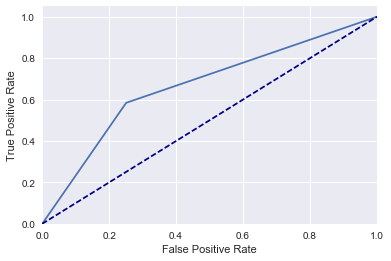

In [108]:
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression - Undersampled data with feature selection')
plt.legend(loc="lower right")
plt.show()


#### XGBoost with simplified features

In [28]:
import xgboost as xgb

/Users/esra/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
clf = xgb.XGBClassifier()
clf= clf.fit(X_train2, y_train)

In [112]:
xg_predicted = pd.DataFrame(clf.predict(X_val2))
from sklearn import metrics
fpr, tpr , thresholds = metrics.roc_curve(y_val,xg_predicted)
metrics.auc(fpr, tpr)

0.5

/Users/esra/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


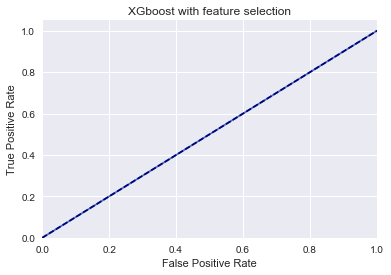

In [113]:
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGboost with feature selection')
plt.legend(loc="lower right")
plt.show()


In [36]:
recall_score(y_val, xg_predicted)

0.0

In [39]:
# 0 click prediction as before
sum(xg_predicted)

0

In [116]:
score3 = clf.score(X_val2, y_val)
print(score3)

0.999335362343


#### XGBoost with simplified features and downsized training data

In [63]:
clf2 = xgb.XGBClassifier()
clf2= clf2.fit(X_resdf, y_res)

In [114]:
xgres_predicted = pd.DataFrame(clf2.predict(X_val2))
from sklearn import metrics
fpr, tpr , thresholds = metrics.roc_curve(y_val,xgres_predicted)
metrics.auc(fpr, tpr)

0.70509830267111218

In [62]:
sum(y_res)

1793

In [89]:
xgres_predicted.columns=['click']
xgres_predicted['click'].sum()

96587

In [66]:
precision_score(y_val, xgres_predicted)

0.0015219439469079689

In [68]:
recall_score(y_val, xgres_predicted)

0.7277227722772277

In [69]:
roc_auc_score(y_val, xgres_predicted)

0.70509830267111218

In [90]:
score2 = clf2.score(X_val2, y_val)
print(score2)

0.682503907214


/Users/esra/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


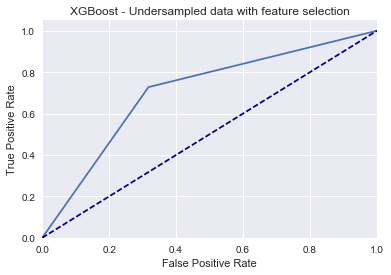

In [115]:
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - Undersampled data with feature selection')
plt.legend(loc="lower right")
plt.show()
